In [8]:
import pandas as pd
import numpy as np
import os 
import glob
from PIL import Image
import cv2
from pathlib import Path
import torch
import matplotlib.pyplot as plt

In [2]:
path = '/Users/maelynenguyen/Desktop/79ca5c85-0d00-45fd-81e9-aa787898ebf5_epfml-segmentation/training'

# Define paths
image_path = os.path.join(path, 'images')
label_path = os.path.join(path, 'groundtruth')


Data Preprocessing

In [ ]:

class Dataset(torch.utils.data.Dataset):
    def __init__(self, images_dir, labels_dir):

        self.images_dir = Path(images_dir)
        self.labels_dir = Path(labels_dir)

        # Collect image and label paths
        self.image_paths = sorted(list(self.images_dir.glob("*.png")))
        self.label_paths = sorted(list(self.labels_dir.glob("*.png")))
        assert len(self.image_paths) == len(self.label_paths), "Mismatch between image and label files"

        # Preload image and label data
        self.image_data_list = [self.load_image(image_path) for image_path in self.image_paths]
        self.label_data_list = [self.load_label(label_path) for label_path in self.label_paths]

        print(f"Found {len(self.image_data_list)} image-label pairs")
        
    def __len__(self):
        return len(self.image_data_list)
    
    def __getitem__(self, index):
        image = self.image_data_list[index]
        label = self.label_data_list[index]
        return image, label

    def load_image(self, image_path):
        # Load PNG image as a NumPy array
        image = cv2.imread(image_path)
        gray = cv2.cvtColor (image, cv2.COLOR_BGR2GRAY)
        normalized = gray / 255.0
        blur = cv2.GaussianBlur(normalized, (5, 5), 0) #can find the best kernel size 
        #edges = cv2.Canny((blur * 255).astype('uint8'), 100, 200)
        return blur
    
    def load_label(self,image_path):
        label = cv2.imread(image_path)
        return label



Found 100 image-label pairs


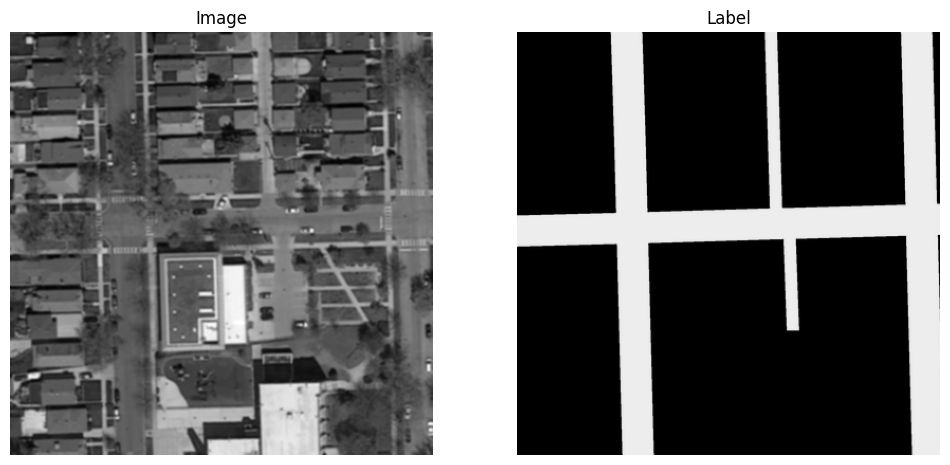

In [11]:
dataset=Dataset(image_path, label_path)
im, lab = dataset[1]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the image
axes[0].imshow(im, cmap='gray')
axes[0].set_title('Image')
axes[0].axis('off')

# Plot the label
axes[1].imshow(lab, cmap='gray')
axes[1].set_title('Label')
axes[1].axis('off')

plt.show()
